In [1]:
import pandas as pd
import pandas_datareader.data as web
import datetime
import numpy as np
import matplotlib.pyplot as plt
from prophet  import Prophet

aaa = pd.read_excel('TSLA_stock.xlsx')

startdate = datetime.datetime(2015,1,1)
enddate = datetime.datetime(2022,1,1)

datalocal = aaa[ [ 'Date', 'Close']]
datalocal.columns=['ds','y']
#datalocal =datalocal.sort_values('ds', axis = 0, ascending = True)
datalocal.head(10)





Importing plotly failed. Interactive plots will not work.


,ds,y
0,2010-06-29,4.778
1,2010-06-30,4.766
2,2010-07-01,4.392
3,2010-07-02,3.840
4,2010-07-06,3.222
5,2010-07-07,3.160
6,2010-07-08,3.492
7,2010-07-09,3.480
8,2010-07-12,3.410
9,2010-07-13,3.628


In [2]:
# Python
datalocal['cap'] = 8.5
datalocal.head(10)


<ipython-input-2-44e702bf8042>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datalocal['cap'] = 8.5


,ds,y,cap
0,2010-06-29,4.778,8.5
1,2010-06-30,4.766,8.5
2,2010-07-01,4.392,8.5
3,2010-07-02,3.840,8.5
4,2010-07-06,3.222,8.5
5,2010-07-07,3.160,8.5
6,2010-07-08,3.492,8.5
7,2010-07-09,3.480,8.5
8,2010-07-12,3.410,8.5
9,2010-07-13,3.628,8.5


In [3]:

# Python
m = Prophet()
m.fit(datalocal)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [4]:

# Python
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3164,2022-08-13
3165,2022-08-14
3166,2022-08-15
3167,2022-08-16
3168,2022-08-17


In [5]:

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
3164,2022-08-13,1096.115341,1029.896552,1171.468568
3165,2022-08-14,1097.686725,1025.388289,1172.232713
3166,2022-08-15,1097.407883,1027.492171,1170.773890
3167,2022-08-16,1098.779764,1027.445106,1179.147825
3168,2022-08-17,1100.614570,1030.792036,1176.725807


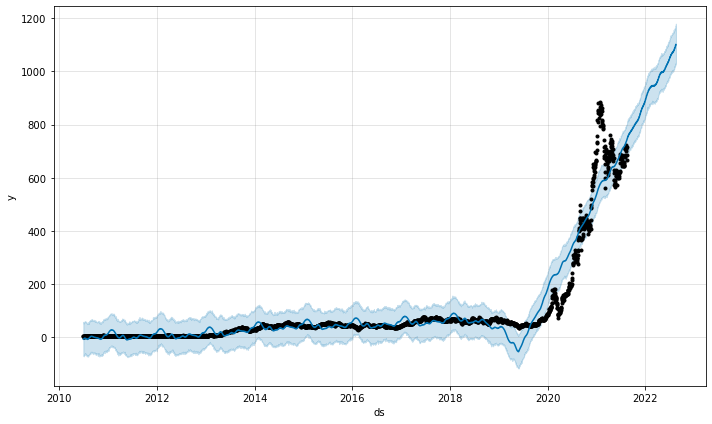

In [6]:
# Python
fig1 = m.plot(forecast)


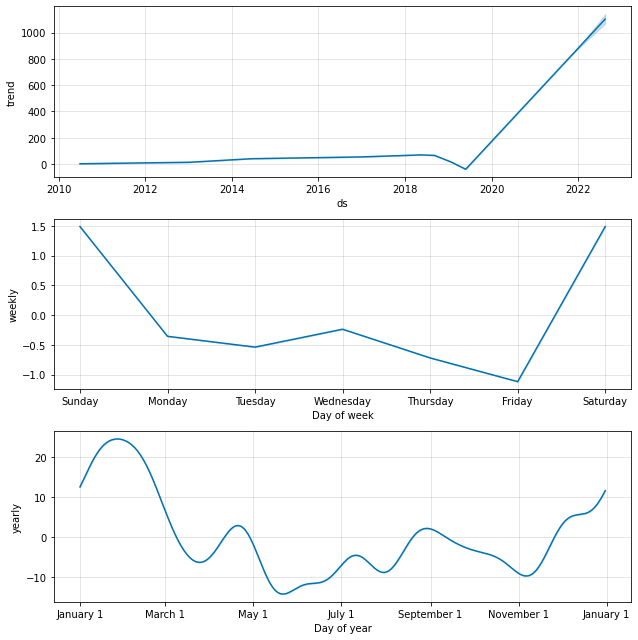

In [7]:
# Python
fig2 = m.plot_components(forecast)


In [8]:
# Python
m = Prophet(growth='logistic')
m.fit(datalocal)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


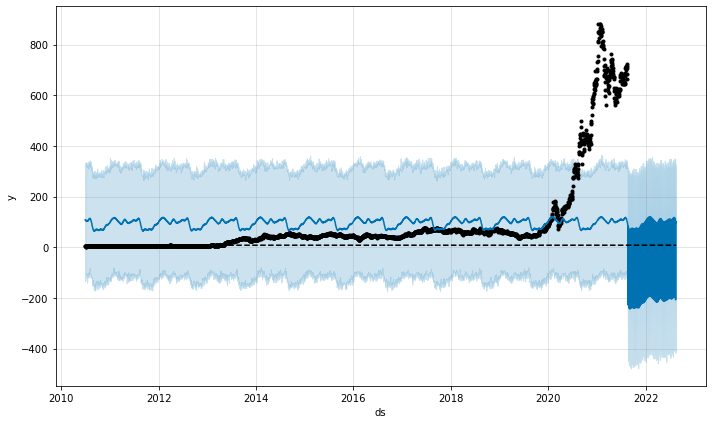

In [9]:
# Python
future = m.make_future_dataframe(periods=365)
future['cap'] = 8.5
fcst = m.predict(future)
fig = m.plot(fcst)

In [10]:
# Python
"""###datalocal['y'] = 10 - datalocal['y']
datalocal['cap'] = 6
datalocal['floor'] = 1.5
futureB['cap'] = 6
futureB['floor'] = 1.5
m = Prophet(growth='logistic')
m.fit(datalocal)
fcst = m.predict(futureB)
fig = m.plot(fcst)//### """

"###datalocal['y'] = 10 - datalocal['y']\ndatalocal['cap'] = 6\ndatalocal['floor'] = 1.5\nfutureB['cap'] = 6\nfutureB['floor'] = 1.5\nm = Prophet(growth='logistic')\nm.fit(datalocal)\nfcst = m.predict(futureB)\nfig = m.plot(fcst)//### "